In [1]:
import requests
import xmltodict
import json
import numpy as np
import scipy.interpolate
import matplotlib.pyplot as plt

In [2]:
def xmlToDict(xml):
    return xmltodict.parse(xml)    

def formatJson(data):
    return json.loads(json.dumps(data))

In [3]:
URL_GET_CODE_CITY = 'http://servicos.cptec.inpe.br/XML/listaCidades'
payload_city = {'city': 'sao jose dos campos'}

r_locale = requests.get(URL_GET_CODE_CITY, params=payload_city)
city = formatJson(xmlToDict(r_locale.content))

In [4]:
city

{'cidades': {'cidade': {'nome': 'São José dos Campos',
   'uf': 'SP',
   'id': '4963'}}}

In [5]:
URL_PREDICTION_4DAYS = 'http://servicos.cptec.inpe.br/XML/cidade/%s/previsao.xml' % city['cidades']['cidade']['id']
r_prediction_4days = requests.get(URL_PREDICTION_4DAYS)
prediction_4days = formatJson(xmlToDict(r_prediction_4days.content))

In [6]:
prediction_4days

{'cidade': {'nome': 'São José dos Campos',
  'uf': 'SP',
  'atualizacao': '2019-03-31',
  'previsao': [{'dia': '2019-04-01',
    'tempo': 'pn',
    'maxima': '28',
    'minima': '17',
    'iuv': '10.0'},
   {'dia': '2019-04-02',
    'tempo': 'pn',
    'maxima': '29',
    'minima': '17',
    'iuv': '10.0'},
   {'dia': '2019-04-03',
    'tempo': 'vn',
    'maxima': '30',
    'minima': '18',
    'iuv': '10.0'},
   {'dia': '2019-04-04',
    'tempo': 'pn',
    'maxima': '30',
    'minima': '19',
    'iuv': '10.0'}]}}

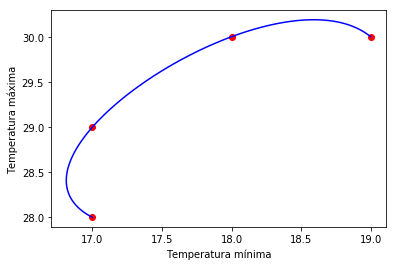

In [10]:
x_min = [int(x['minima']) for x in prediction_4days['cidade']['previsao']]
y_max = [int(x['maxima']) for x in prediction_4days['cidade']['previsao']]
plt.figure()
u = plt.plot(x_min,y_max, 'ro')
t = np.linspace(0, 1, len(x_min))
x_min.append(10)
pxLagrange = scipy.interpolate.lagrange(t, x_min)
pyLagrange = scipy.interpolate.lagrange(t, y_max)
n = 100
ts = np.linspace(t[0],t[-1],n)
xLagrange = pxLagrange(ts)
yLagrange = pyLagrange(ts)
plt.plot(xLagrange, yLagrange,'b-',label = "Polynomial")
plt.xlabel('Temperatura mínima')
plt.ylabel('Temperatura máxima')
plt.show()

In [11]:
pxLagrange

poly1d([-4.5,  9. , -2.5, 17. ])

In [12]:
x_min

[17, 17, 18, 19, 10]